In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./diamonds.csv')
df.head(6)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [4]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
49999,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
df.shape

(50000, 10)

This dataset contain 49,874 rows and 10 columns.

In [6]:
col = list(df.columns)
num = list(df._get_numeric_data())
cat = list(set(col) - set(num))

print("All features : ")
print(col)
print("\nNumerical features : ")
print(num)
print("\nCategorical features : ")
print(cat)

All features : 
['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

Numerical features : 
['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

Categorical features : 
['cut', 'color', 'clarity']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


carat : Diamond weight in carat	

cut : Diamond cutting quality	

color : Diamond color from J (worst) to D (best)	

clarity : A measure of diamond clarity (from worst to best: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)	

x : Diamond length in mm	

y : Diamond width in mm	

z : Diamond depth in mm	

depth : Percentage depth that is equal to z / mean(x, y)	

table : The width of the widest point at the top of the diamond	

price : Diamond price (target variable) 

In [8]:
df.describe()

,carat,depth,table,price,x,y,z
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.799444,61.753006,57.457830,3944.805440,5.734403,5.737956,3.541056
std,0.475173,1.431088,2.232092,3997.938105,1.123077,1.145579,0.707065
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2410.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5351.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Dealing with Duplicate values.

In [9]:
df.duplicated().sum()

126

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.shape

(49874, 10)

now it has 49,874 rows and 10 columns.

# Dealing with Null values.

In [12]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no null values in that dataset.

# Dealing with unacceptable values.

x, y, z, depth and table are length so they can't be less than zero

In [13]:
df.loc[(df['x'] < 0) | (df['y'] < 0) | (df['z'] < 0) | (df['depth'] < 0) | (df['table'] < 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z


# Make new column volume

In [14]:
df['volume'] = df['x'] * df['y'] * df['z']
df.drop(columns = ['x', 'y', 'z'], axis = 1, inplace = True)
df.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,51.917250


In [15]:
df.shape

(49874, 8)

Now it has 49, 874 rows and 8 columns.

In [16]:
col = list(df.columns)
num = list(df._get_numeric_data())
cat = list(set(col) - set(num))

print("All features : ")
print(col)
print("\nNumerical features : ")
print(num)
print("\nCategorical features : ")
print(cat)

All features : 
['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'volume']

Numerical features : 
['carat', 'depth', 'table', 'price', 'volume']

Categorical features : 
['cut', 'color', 'clarity']


<Figure size 2000x2000 with 0 Axes>

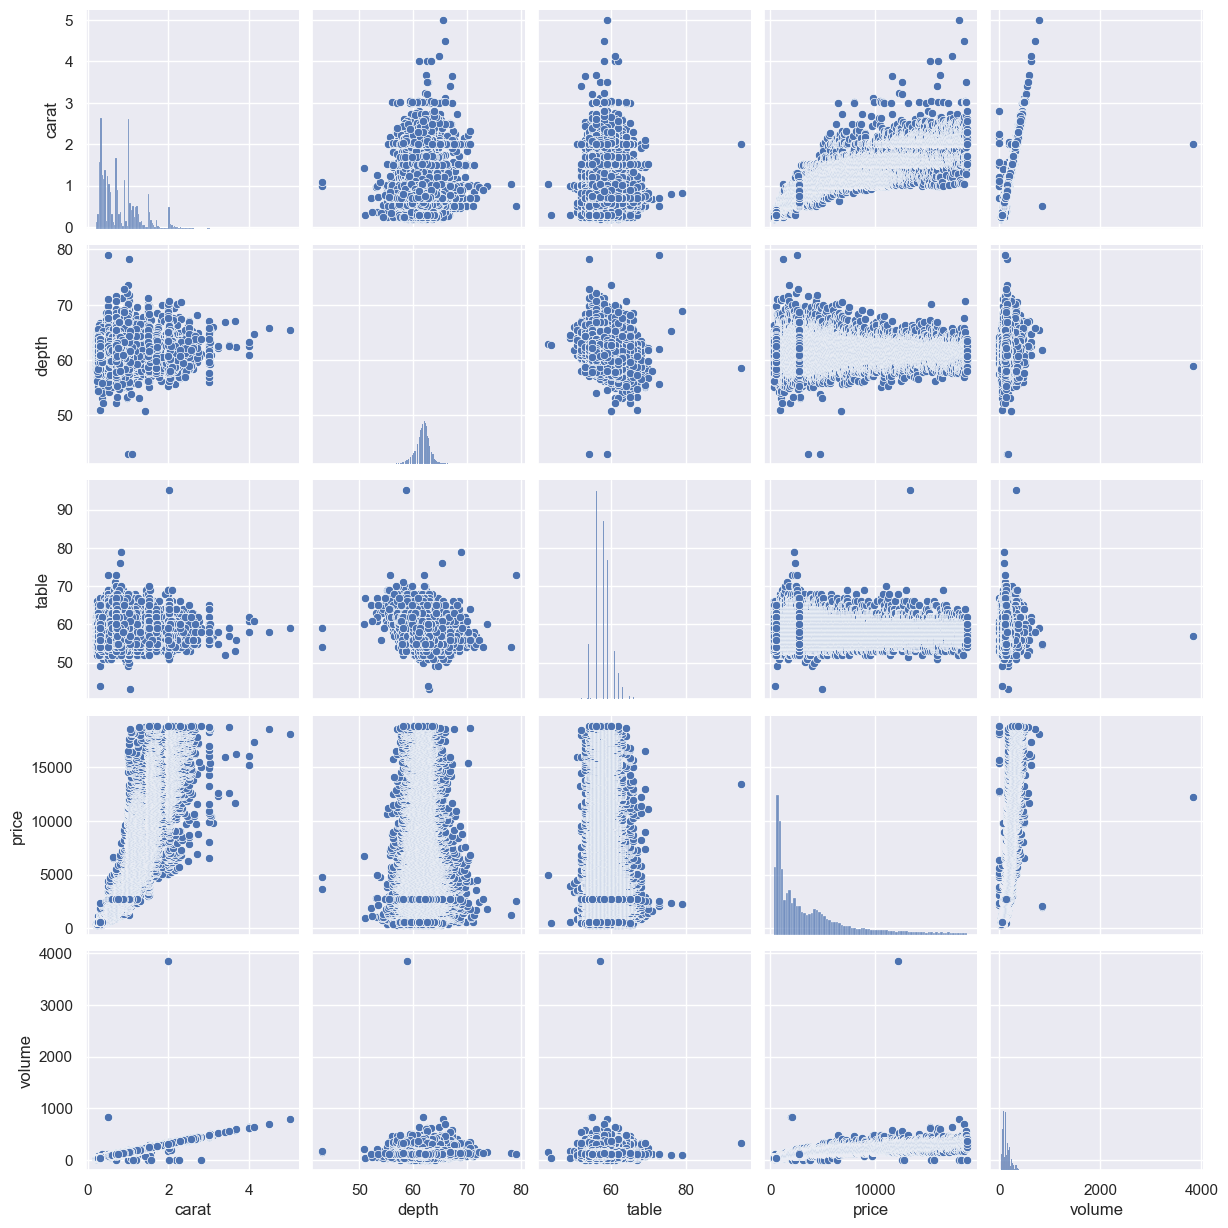

In [17]:
sns.set()
plt.figure(figsize = (20, 20))
sns.pairplot(data = df)
plt.show()

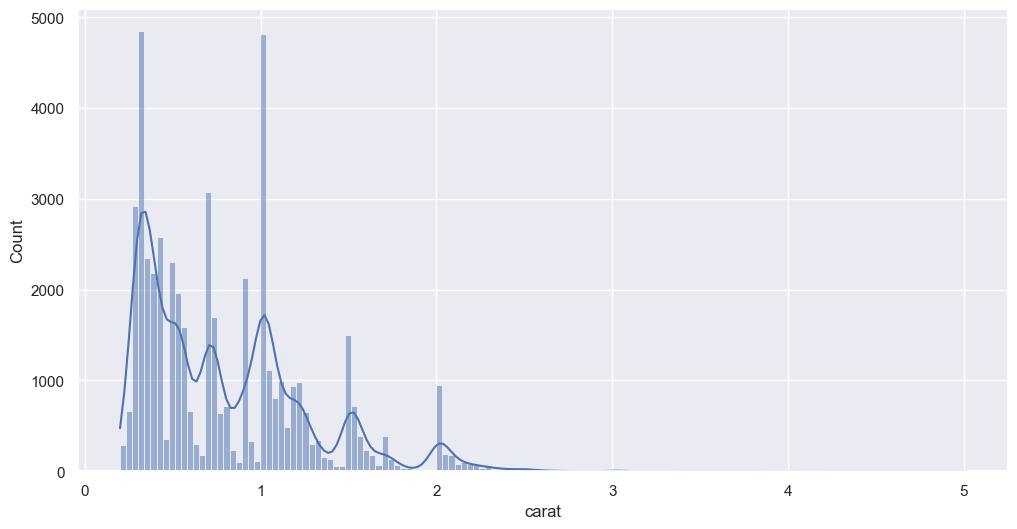

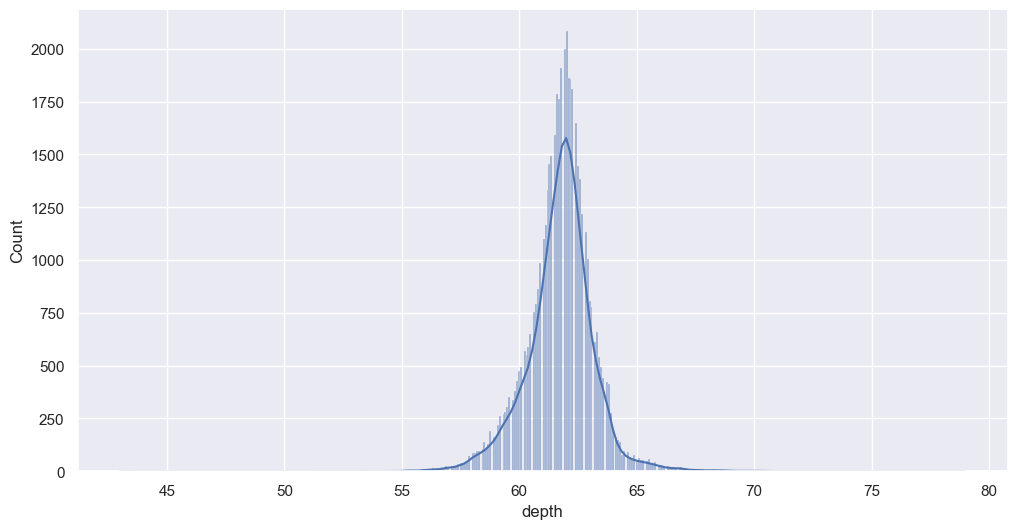

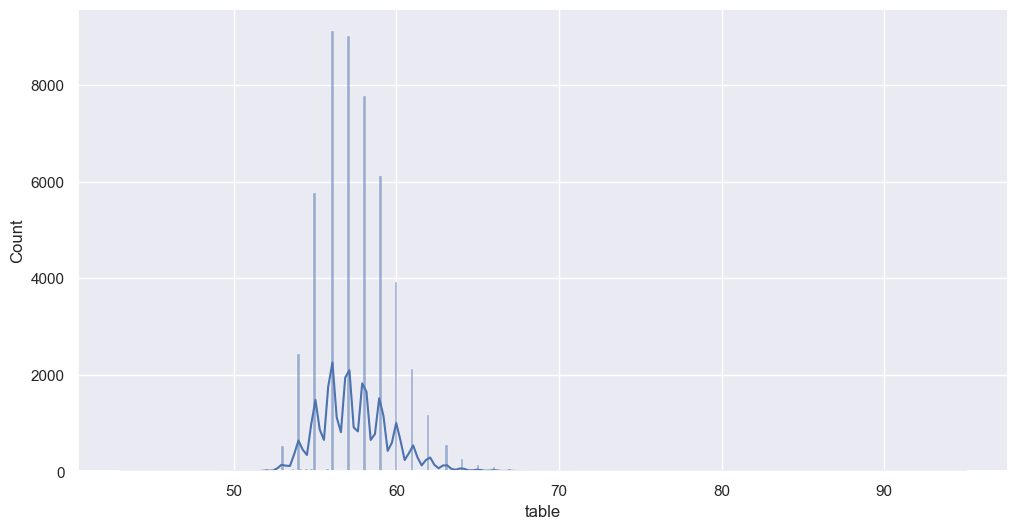

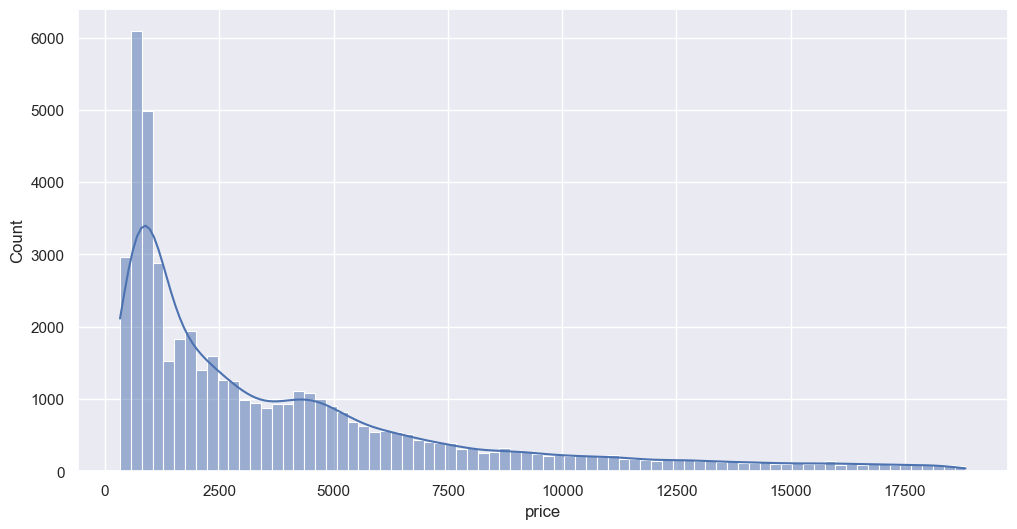

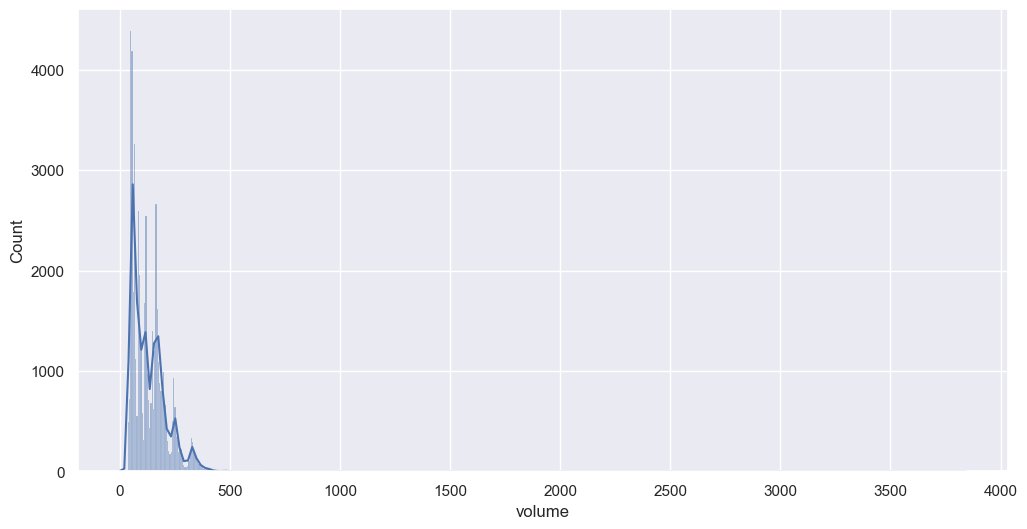

In [18]:
for i in num:
    sns.set()
    plt.figure(figsize = (12, 6))
    sns.histplot(data = df, x = i, kde=True)
    plt.show()

Ideal        19881
Premium      12769
Very Good    11194
Good          4547
Fair          1483
Name: cut, dtype: int64 



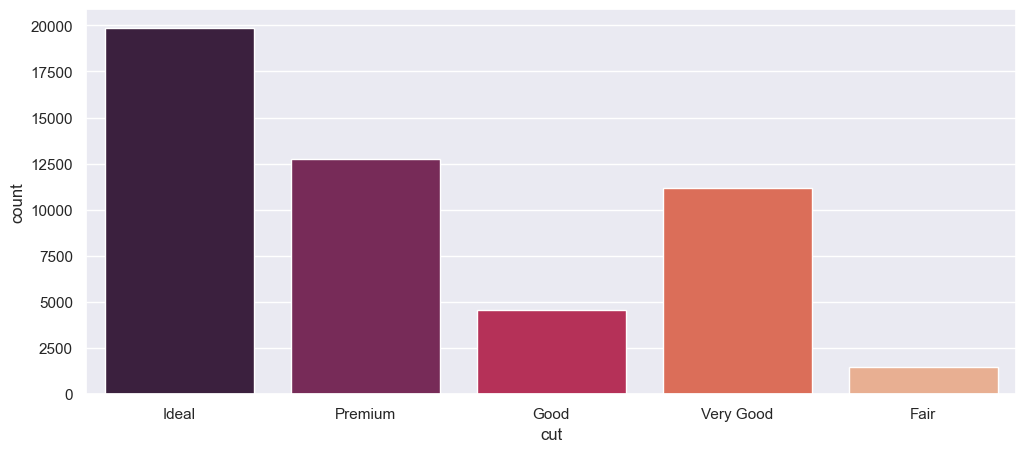

G    10424
E     9067
F     8844
H     7683
D     6209
I     5045
J     2602
Name: color, dtype: int64 



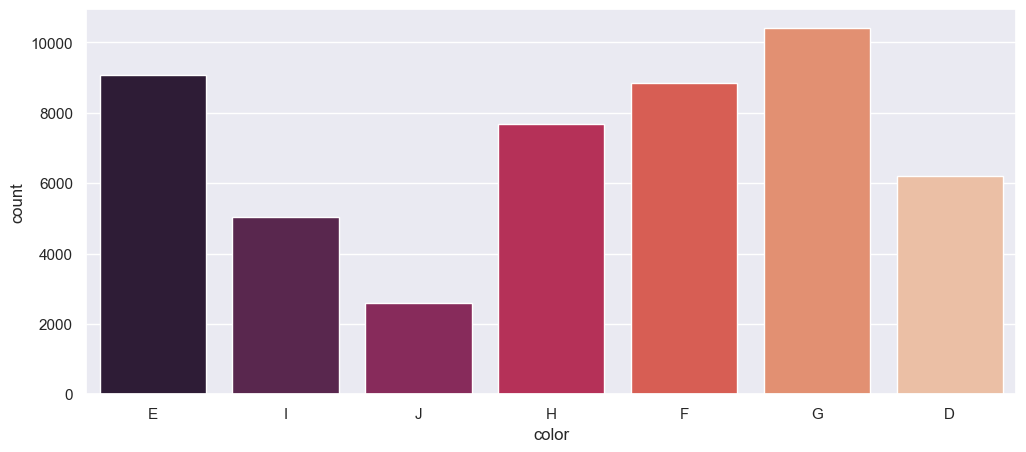

SI1     12086
VS2     11378
SI2      8483
VS1      7564
VVS2     4687
VVS1     3363
IF       1626
I1        687
Name: clarity, dtype: int64 



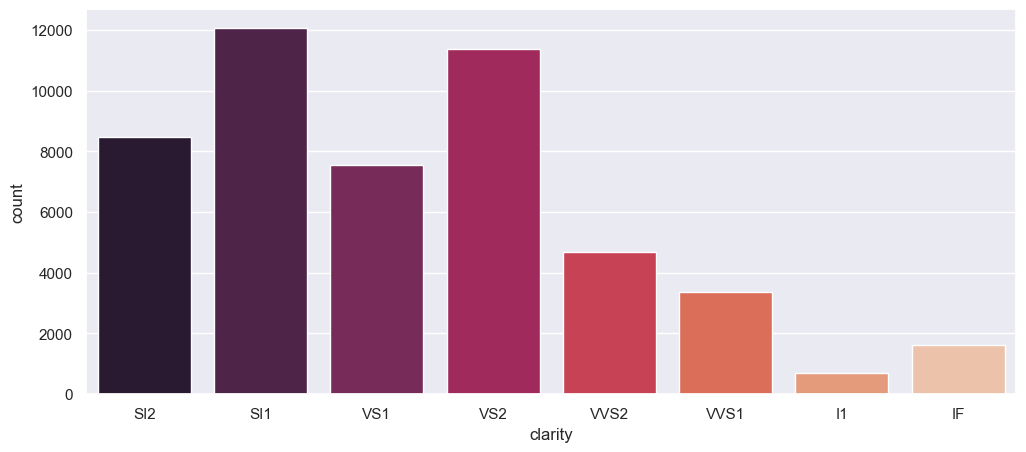

In [19]:
for i in cat:
    print(df[i].value_counts(), "\n")
    sns.set()
    plt.figure(figsize = (12, 5))
    sns.countplot(x = i, data = df, palette = 'rocket')
    plt.show()

In [20]:
df = pd.get_dummies(data = df, columns = cat)
df.head()

,carat,depth,table,price,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,38.202030,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,34.505856,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,38.076885,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,46.724580,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,51.917250,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0


# Dealing with outliers.

In [21]:
for i in num:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = (Q3 - Q1)
    upper = Q3 + (1.5 * IQR) 
    lower = Q1 - (1.5 * IQR) 
    df.loc[(df[i] >= upper), i] = upper
    df.loc[(df[i] <= lower), i] = lower

# Split data

In [22]:
x = df.drop(columns = 'price', axis = 1)
y = df['price']

In [23]:
x.head()

,carat,depth,table,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.50,55.0,38.202030,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.80,61.0,34.505856,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,58.75,63.5,38.076885,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.40,58.0,46.724580,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.30,58.0,51.917250,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [24]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

# Scaling data

In [25]:
mm = MinMaxScaler()
mm.fit(x)

MinMaxScaler()

In [26]:
x1 = mm.transform(x)
x = pd.DataFrame(data = x1, columns = x.columns, index = x.index)

In [27]:
df.head(3)

,carat,depth,table,price,volume,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.50,55.0,326,38.202030,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.80,61.0,326,34.505856,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,58.75,63.5,327,38.076885,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


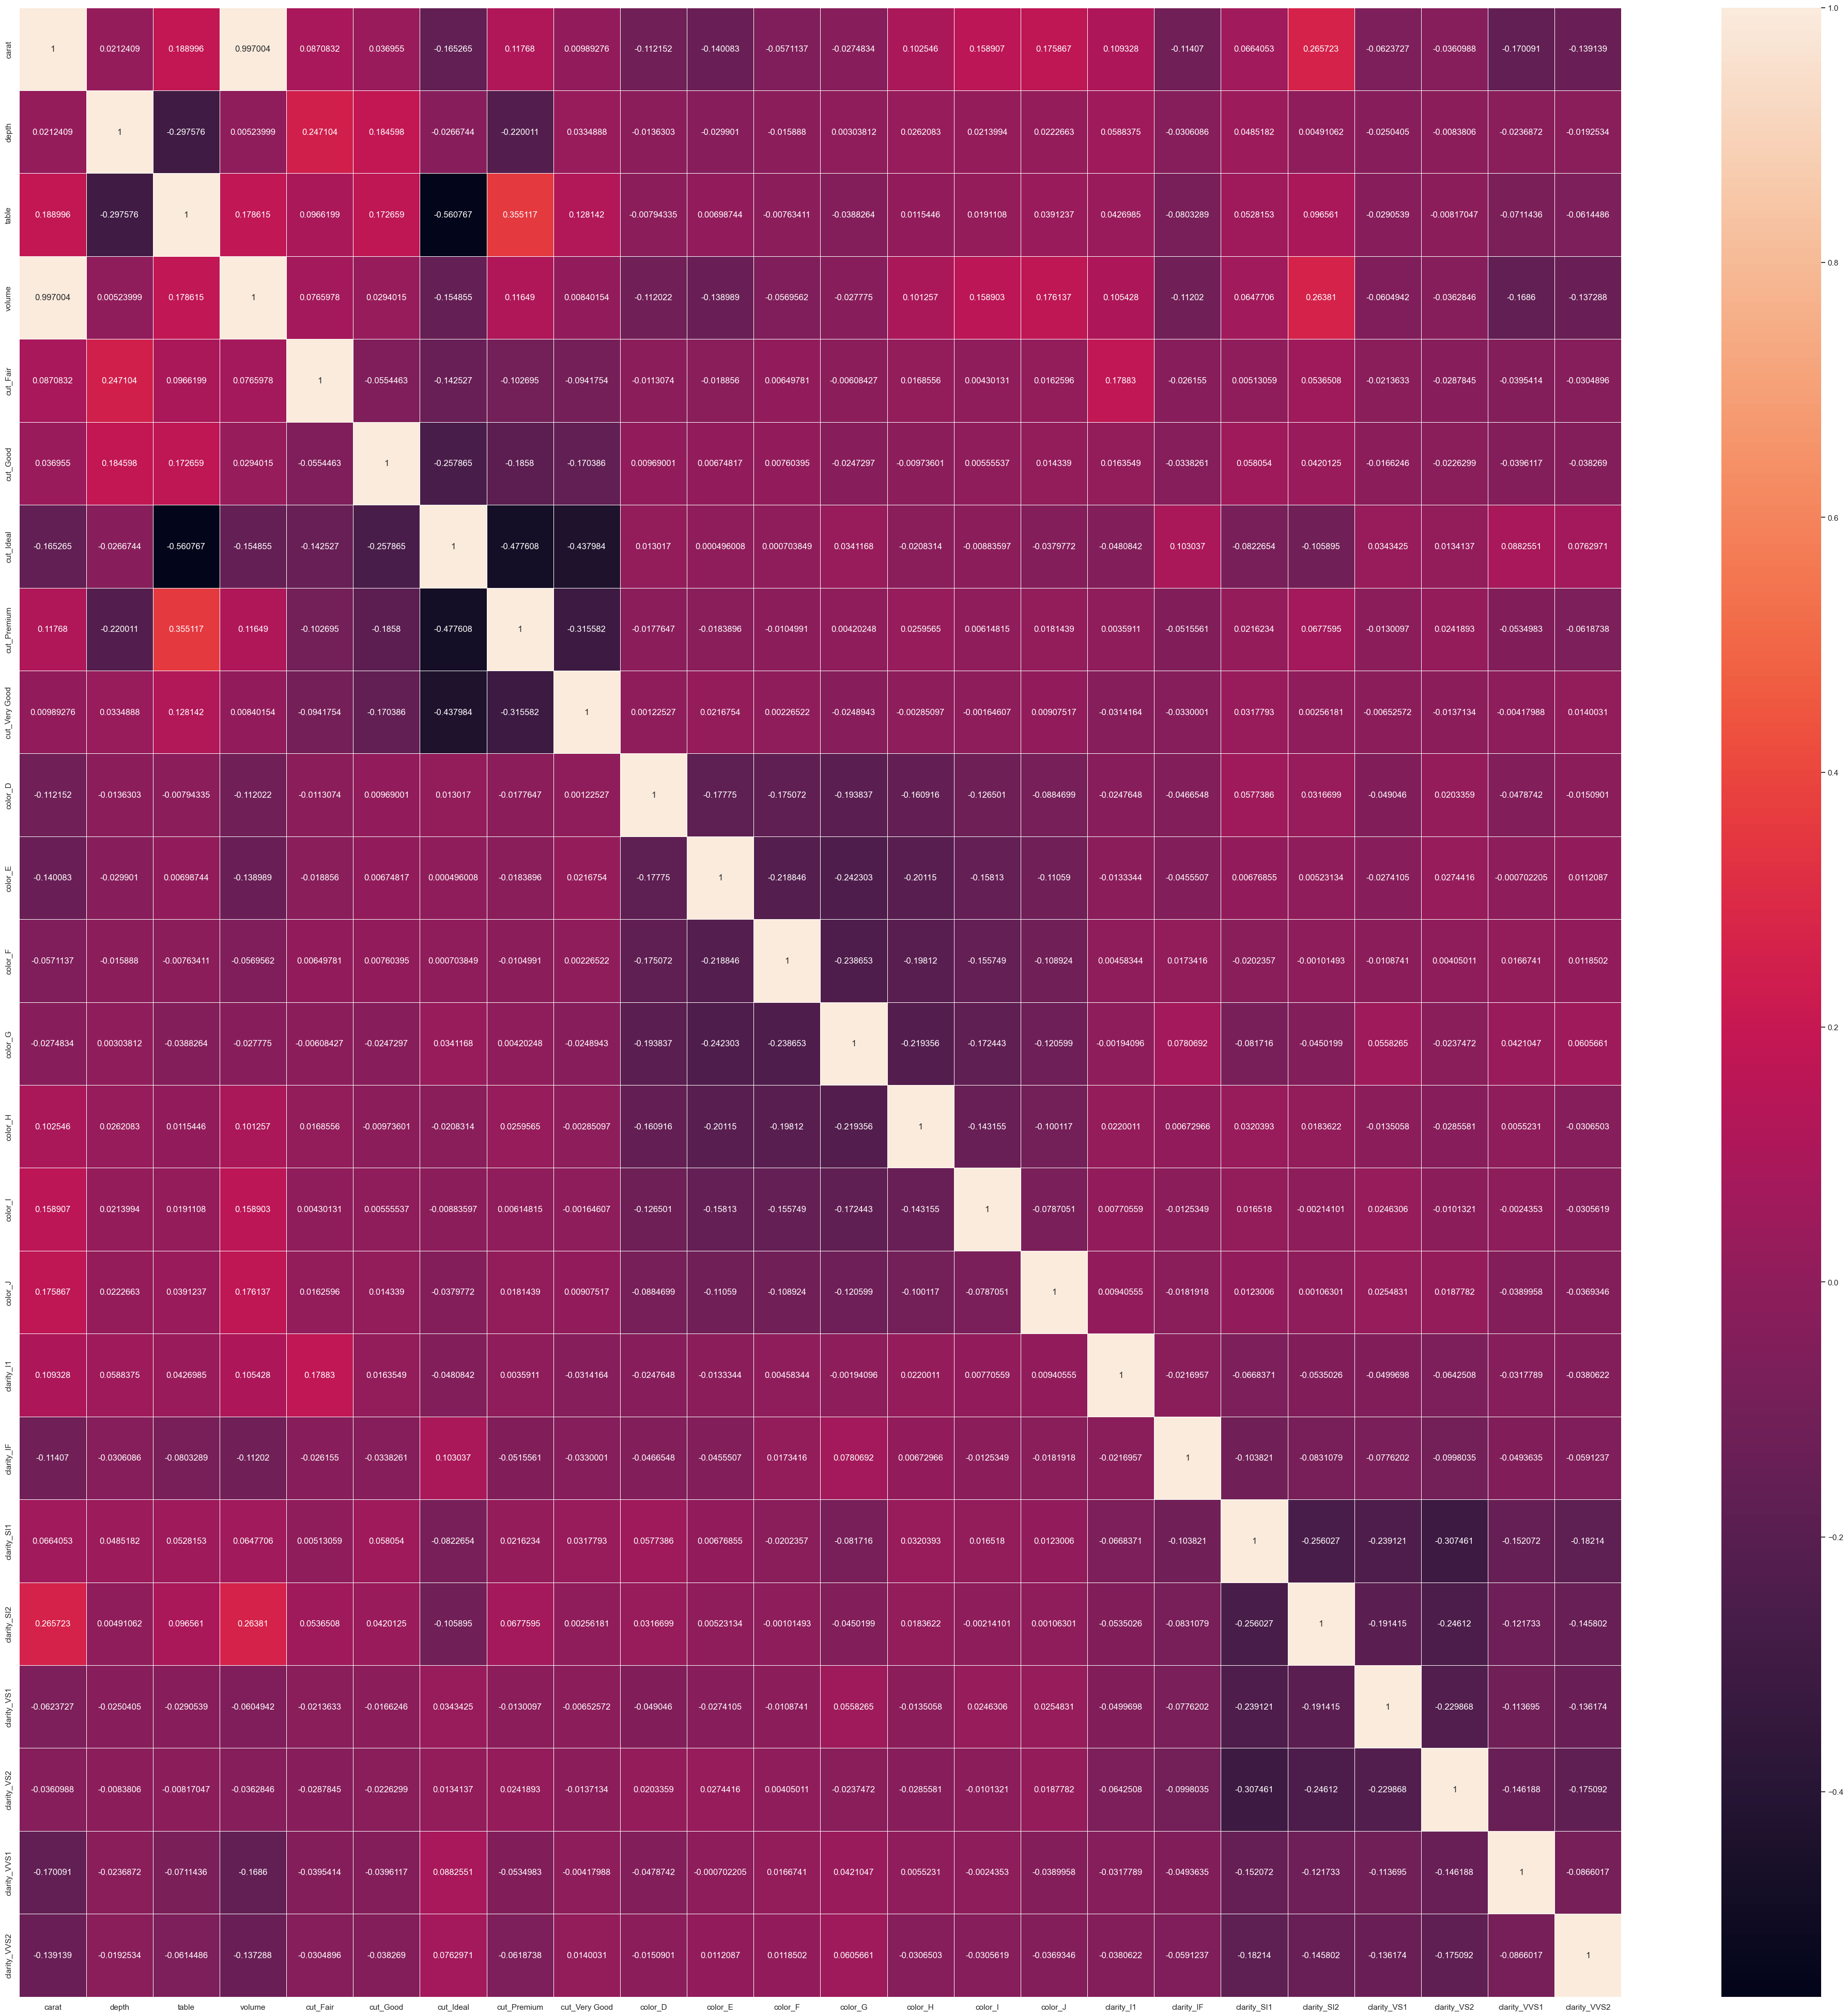

In [28]:
sns.set()
plt.figure(figsize = (50, 50))
sns.heatmap(x.corr(), annot = True, cmap = 'rocket', fmt = 'g', linewidths = 0.6)
plt.show()

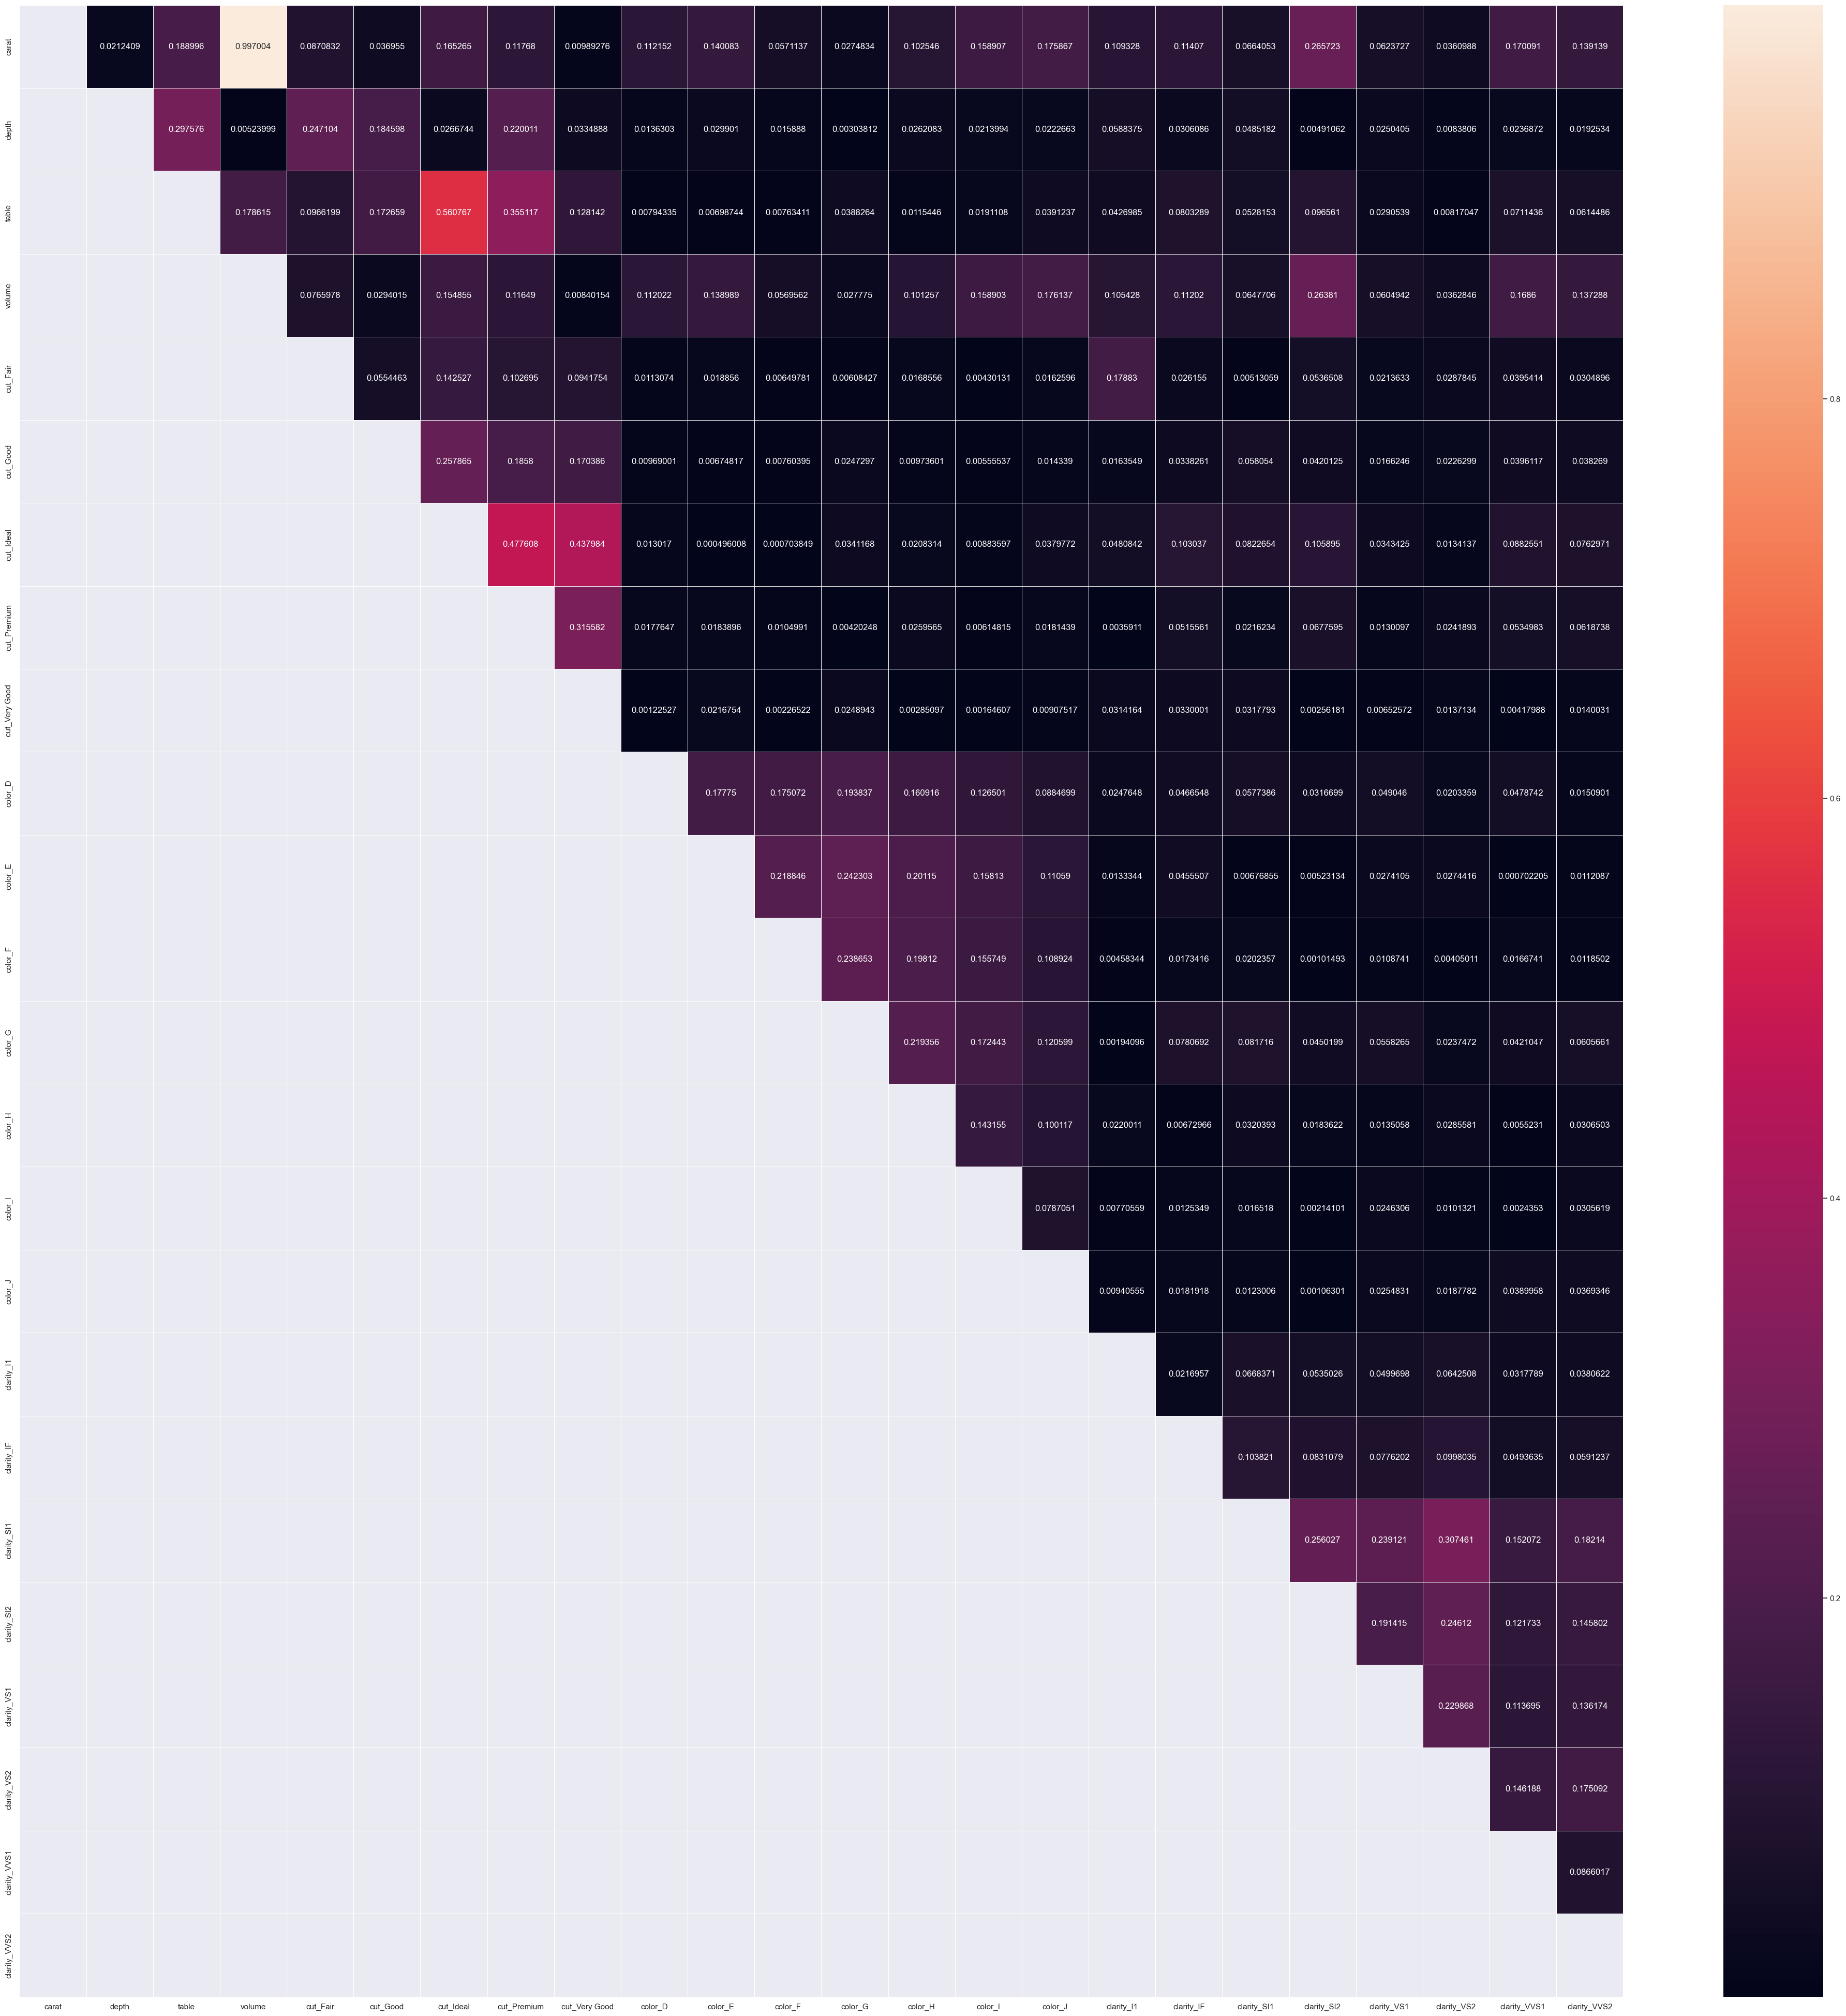

In [30]:
corr = x.corr().abs()

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

sns.set()
plt.figure(figsize = (50, 50))
sns.heatmap(upper, annot = True, linewidths = 0.6, fmt = 'g', cmap = 'rocket')
plt.show()

In [31]:
to_drop = list(column for column in upper.columns if any(upper[column] > 0.95))

to_drop

['volume']

In [32]:
x.drop(columns = to_drop, axis = 1, inplace = True)
x.head(3)

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.016667,0.458333,0.291667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.005556,0.175000,0.791667,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.016667,0.000000,1.000000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Model building

In [35]:
def func (x, y):
    algoritm = {
        'KNeighborsRegressor' : {
            'model' : KNeighborsRegressor(),
            "param_grid" : {
                'n_neighbors': [3, 5, 7],  
                'weights': ['uniform', 'distance']    
            }
        },
        
        'DecisionTreeRegressor' : {
            'model' : DecisionTreeRegressor(),
            "param_grid" : {
                'criterion': ['mse', 'friedman_mse'],
                'max_depth': [5, 10],
                'min_samples_split': [2, 5], 
            }
        },
        
        'ExtraTreesRegressor' : {
            'model' : ExtraTreesRegressor(),
            "param_grid" : {
                'n_estimators': [200, 300],
                'criterion': ['mse', 'mae'],
                'max_depth': [None, 10]
            }
        },
        
        'GradientBoostingRegressor' : {
            'model' : GradientBoostingRegressor(),
            "param_grid" : {
                'learning_rate': [0.01, 0.1, 1.0],
                'n_estimators': [100, 200, 300]
            }
        },
        
        'RandomForestRegressor' : {
            'model' : RandomForestRegressor(),
            "param_grid" : {
                'n_estimators': [100, 200, 300],
                'min_samples_split': [2, 5, 10]
            }
        },
        
        'SVR' : {
            'model' : SVR(),
            "param_grid" : {
                'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [0.1, 1.0],
                'gamma': ['scale', 'auto']
            }
        }
    }
    
    alg = []
    best_score = []
    best_param = []
    
    cv = ShuffleSplit(n_splits=4, test_size=0.2, random_state=0)

    
    for i, j in algoritm.items():
        gsc = GridSearchCV(j['model'], j['param_grid'], cv = cv)
        gsc.fit(x, y)
        
        alg.append(i)
        best_score.append(gsc.best_score_)
        best_param.append(gsc.best_params_)
        
    adf = pd.DataFrame({'Algorithms' : alg, 'Best Score' : best_score, 'Best parameters' : best_param})
        
    return adf

In [ ]:
adf = func(x, y)

In [ ]:
adf

In [ ]:
adf.max()